## **Mount Google Drive to Store Files and Data**

In [2]:
# Berikut adalah link yang dapat Anda set dalam kode program Anda. Anda dapat mendownload dataset yang Anda butuhkan melalui link berikut:
# Link 1000 images: https://www.dropbox.com/s/c0yfe4bpt0orb0m/paintings1k.zip?dl=1
# Link 5000 images: https://www.dropbox.com/s/yhu8v2yhft70doh/paintings5k.zip?dl=1
# Link 10000 images: https://www.dropbox.com/s/16jrkfrdm0c543q/paintings15k.zip?dl=1

# File yang terdownload akan dalam format .zip. Silakan disimpan di direktori Anda.

In [ ]:
# Gunakan fungsi ini jika Anda menjalankan kode program pada google collab dan menggunakan google drive untuk menyimpan file.

from google.colab import drive
drive.mount('/content/drive')

# Jika Anda menjalankan pada komputer Anda, abaikan blok program ini.

### **Penjelasan Logika & Output: Mount Google Drive**

**Logika Kode:**
Blok kode ini fungsinya buat nyambungin Google Colab sama Google Drive kamu. Perintah `drive.mount('/content/drive')` akan memicu proses otentikasi. Kamu bakal dikasih link buat nge-klik, login ke akun Google kamu, dan ngasih izin ke Colab buat ngakses file di Drive kamu. Setelah itu, kamu dapet kode otorisasi yang harus di-paste balik ke Colab.

**Output/Efek:**
Kalo berhasil, outputnya bakal nunjukkin "Mounted at /content/drive". Ini artinya semua file di Google Drive kamu sekarang bisa diakses dari Colab lewat folder `/content/drive`. Ini dibutuhin buat baca dataset (`.zip`) dan nyimpen hasil model nanti.

## **1) Importing Python Packages for GAN**


In [4]:
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D, Dense, Conv2DTranspose
from keras.layers import Dropout
from keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
import numpy as np
!mkdir generated_images resized_images

### **Penjelasan Logika & Output: 1) Importing Python Packages for GAN**

**Logika Kode:**
Ini bagian impor library standar buat bikin model.
* `keras.models` dan `keras.layers` dipake buat ngebangun arsitektur modelnya (Sequential, Conv2D, Dense, dll).
* `Conv2DTranspose` itu lapisan khusus buat *upsampling* di Generator (kebalikan dari Conv2D).
* `LeakyReLU` itu fungsi aktivasi yang sering dipake di GAN biar latihannya stabil.
* `Adam` itu optimizer yang bakal ngatur cara modelnya belajar.
* `numpy` buat ngurusin data-data gambar dalam bentuk array.
* `!mkdir generated_images resized_images` itu perintah *shell* buat bikin dua folder baru. `resized_images` buat nyimpen gambar dataset yang udah kita seragamin ukurannya, dan `generated_images` buat nyimpen hasil gambar buatan si Generator.

**Output/Efek:**
Semua library yang dibutuhin jadi siap pake. Selain itu, dua folder baru (`generated_images` dan `resized_images`) dibuat di direktori kerja Colab.

In [ ]:
# Unzip the-zip-file -d name-of-destination-folder
# the-zip-file: path dari folder sumber data yang akan Anda gunakan.
# name-of-destination-folder: nama folder yang tempat hasil file yang akan di unzip disimpan.
# Contoh: !unzip /content/drive/MyDrive/paintings1k.zip -d 5kImage

In [5]:
!unzip /content/drive/MyDrive/paintings1k.zip -d 5kImage

unzip:  cannot find or open /content/drive/MyDrive/paintings1k.zip, /content/drive/MyDrive/paintings1k.zip.zip or /content/drive/MyDrive/paintings1k.zip.ZIP.


### **Penjelasan Logika & Output: Unzip Dataset**

**Logika Kode:**
Kode ini (setelah kamu ngasih *path* yang bener) ngejalanin perintah `!unzip`. Perintah ini nge-ekstrak file `.zip` yang isinya dataset lukisan. Di contoh ini, dia ngambil file `paintings1k.zip` dari Google Drive (`/content/drive/MyDrive/`) dan nge-ekstrak semua isinya ke folder baru yang namanya `5kImage`.

**Output/Efek:**
Outputnya bakal nampilin proses *unzipping*, file apa aja yang diekstrak. Hasil akhirnya, semua gambar lukisan dari file zip tadi sekarang ada di dalem folder `5kImage`.

In [6]:
# Isi bagian didalam tanda "" dengan alamat path dari image yang akan Anda gunakan.
# Hint: klik kanan pada folder yang Anda tuju, kemudian pilih copy-path.
# Contoh: /content/drive/5kImage

images_path = "<...>"

### **Penjelasan Logika & Output: Set Path Gambar**

**Logika Kode:**
Di sini kita harus ngasih tau programnya di mana letak folder yang isinya gambar-gambar lukisan tadi (yang abis kita unzip). Kamu harus ganti bagian `"<...>"` dengan *path* (alamat) yang bener ke folder itu. Kalo ngikutin contoh sebelumnya, *path*-nya harusnya `"/content/5kImage"` (tanpa tanda `/` di akhir, sesuai logika kode *resizing*).

**Output/Efek:**
Variabel `images_path` bakal nyimpen *path* (string) ke dataset lukisan. Gak ada output keliatan, tapi variabel ini penting banget buat langkah selanjutnya.

## **Resizing Data to match Neural Network Input**

In [ ]:
import os
# from PIL import Image
import cv2
reshape_size = (64,64)

i = 0
for image in os.listdir(images_path):
  # print(image)
  img = cv2.imread(images_path + image)
  img = cv2.resize(img, reshape_size)
  cv2.imwrite("resized_images/%d.png" % i,img)
  # print(img.shape)
  i = i+1

### **Penjelasan Logika & Output: Resizing Data**

**Logika Kode:**
Model GAN butuh semua gambar input punya ukuran yang sama persis. Kode ini nge-loop semua file gambar yang ada di `images_path`. Buat tiap gambar, dia:
1.  Ngebaca gambar pake `cv2.imread`. *Path* gambarnya digabung dari `images_path + image` (ini sebabnya `images_path` di atas tadi baiknya gak pake `/` di akhir).
2.  Nge-resize gambar itu jadi ukuran `(64,64)` piksel pake `cv2.resize`.
3.  Nyimpen gambar yang udah di-resize tadi ke folder `resized_images` dengan nama file baru (kayak `0.png`, `1.png`, `2.png`, dst.).

**Output/Efek:**
Folder `resized_images` bakal keisi sama semua gambar lukisan dari dataset kamu, tapi sekarang ukurannya udah seragam 64x64. Ini bakal jadi data training asli buat Diskriminator.

## **2) Parameters for Neural Networks & Data**

In [8]:
img_width = 64
img_height = 64
channels = 3
img_shape = (img_width, img_height, channels)
latent_dim = 100
adam = Adam(learning_rate=0.0002)

### **Penjelasan Logika & Output: 2) Parameters for Neural Networks & Data**

**Logika Kode:**
Blok ini ngatur parameter-parameter utama buat model GAN kita:
* `img_width` dan `img_height` di-set ke 64, nyamain ukuran gambar yang udah kita *resize*.
* `channels` di-set ke 3, karena gambar kita berwarna (RGB).
* `img_shape` itu gabungan dari ketiganya: `(64, 64, 3)`. Ini bentuk input buat Diskriminator nanti.
* `latent_dim = 100` itu ukuran dari vektor *noise* acak yang jadi 'inspirasi' buat si Generator.
* `adam` itu optimizer yang kita pake, di-set *learning rate*-nya ke 0.0002.

**Output/Efek:**
Gak ada output visual. Semua variabel ini disimpen di memori buat dipake pas ngebangun arsitektur model.

## **3) Building Generator**





In [9]:
def build_generator():
    model = Sequential()
    model.add(Dense(256 * 8* 8, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((8,8,256)))

    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))

    model.summary()

    return model

generator = build_generator()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16384)          │     1,654,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 16, 16, 128)    │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 32, 32, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 64, 64, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 3)      │         3,459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,707,203 (10.33 MB)

 Trainable params: 2,707,203 (10.33 MB)

 Non-trainable params: 0 (0.00 B)

### **Penjelasan Logika & Output: 3) Building Generator**

**Logika Kode:**
Ini adalah arsitektur buat si **Generator**, 'seniman pemalsu'-nya. Tujuannya ngubah *noise* acak (100 angka) jadi gambar 64x64x3.
1.  Awalnya pake `Dense` *layer* buat ngubah vektor 100 tadi jadi data yang lebih gede (`256 * 8 * 8`).
2.  Di-`Reshape` jadi `(8, 8, 256)`. Ini kayak 'kanvas' 3D kecil.
3.  Pake `Conv2DTranspose` tiga kali. Ini lapisan buat *upsampling*, ngegedein gambar secara bertahap: dari 8x8 -> 16x16 -> 32x32 -> 64x64.
4.  Terakhir, pake `Conv2D` biasa buat ngubah jadi 3 *channel* (RGB) dan pake aktivasi `tanh`. Aktivasi `tanh` bikin nilai piksel outputnya antara -1 dan 1.
5.  `generator = build_generator()` ngejalanin fungsi ini dan nyimpen modelnya ke variabel `generator`.

**Output/Efek:**
Outputnya adalah `model.summary()` dari si Generator, nunjukkin daftar lapisan, bentuk *output* di tiap lapisan, dan jumlah total parameter (bobot) yang harus dilatih.

## **4) Building Discriminator**

In [10]:
def build_discriminator():
    model = Sequential()
    model.add(Conv2D(64, (3,3), padding='same', input_shape=img_shape))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(128, (3,3), padding='same', ))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(128, (3,3), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(256, (3,3), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()
    return model

discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1048576)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1048576)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │     1,048,577 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,566,977 (5.98 MB)

 Trainable params: 1,566,977 (5.98 MB)

 Non-trainable params: 0 (0.00 B)

### **Penjelasan Logika & Output: 4) Building Discriminator**

**Logika Kode:**
Ini arsitektur buat si **Diskriminator**, 'kritikus seni'-nya. Tujuannya nerima gambar (asli atau palsu) dan nebak itu asli (output 1) atau palsu (output 0).
1.  Awalnya pake `Conv2D` yang nerima input gambar `(64, 64, 3)`.
2.  Dilanjutin beberapa *layer* `Conv2D` lagi. Ini buat nge-ekstrak fitur-fitur dari gambar.
3.  `Flatten` ngubah data fitur 3D tadi jadi 1D (vektor panjang).
4.  `Dropout(0.4)` dipake buat regularisasi, biar modelnya gak *overfitting* (terlalu ngapalin data *training*).
5.  Terakhir, `Dense(1, activation='sigmoid')` ngasih *output* satu angka antara 0 dan 1 (probabilitas keaslian).
6.  Modelnya di-`compile` pake `binary_crossentropy` (karena ini klasifikasi biner) dan *optimizer* `adam`.

**Output/Efek:**
Sama kayak Generator, outputnya adalah `model.summary()` dari si Diskriminator. Model yang udah di-*compile* disimpen ke variabel `discriminator`.

## **5) Connecting Neural Networks to build GAN**

In [11]:
GAN = Sequential()
discriminator.trainable = False
GAN.add(generator)
GAN.add(discriminator)

GAN.compile(loss='binary_crossentropy', optimizer=adam)

In [12]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16384)          │     1,654,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 16, 16, 128)    │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 32, 32, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 64, 64, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 3)      │         3,459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,707,203 (10.33 MB)

 Trainable params: 2,707,203 (10.33 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1048576)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1048576)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │     1,048,577 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,566,977 (5.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,566,977 (5.98 MB)

### **Penjelasan Logika & Output: 5) Connecting Neural Networks to build GAN**

**Logika Kode:**
Di sini kita gabungin Generator dan Diskriminator jadi satu model `GAN` besar.
1.  Bikin model `Sequential` baru.
2.  **Langkah Kunci:** `discriminator.trainable = False`. Ini 'ngebekuin' si Diskriminator.
3.  Masukin `generator` ke model GAN, terus masukin `discriminator` yang udah beku.
4.  Model `GAN` ini di-`compile`.
Tujuannya: pas kita latih model `GAN` ini, inputnya *noise* dan outputnya tebakan Diskriminator. Karena Diskriminator-nya beku, *error* (*loss*) yang didapet cuma bakal dipake buat nge-*update* bobot si **Generator**. Jadi, Generator belajar nipu Diskriminator.

**Output/Efek:**
Sel ini gak ngasih *output*, tapi sel-sel berikutnya nge-print `summary()` dari Generator dan Diskriminator lagi, mungkin cuma buat ngecek ulang arsitekturnya.

## **6) Outputting Images**


In [14]:
import matplotlib.pyplot as plt
import glob
import imageio
import PIL

save_name = 0.00000000

def save_imgs(epoch):
    r, c = 4, 4
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    gen_imgs = generator.predict(noise)
    global save_name
    save_name += 0.00000001

    # Rescale images 0 - 1
    gen_imgs = (gen_imgs + 1) / 2.0

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt])
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("currentgeneration.png")
    fig.savefig("generated_images/%.8f.png" % save_name)
    plt.close()

### **Penjelasan Logika & Output: 6) Outputting Images**

**Logika Kode:**
Ini definisi fungsi `save_imgs` yang bakal kita panggil pas latihan.
1.  Fungsi ini bikin 16 gambar (grid 4x4) pake `generator.predict` dari *noise* acak.
2.  Pake variabel global `save_name` yang ditambahin dikit-dikit tiap kali dipanggil, biar nama filenya unik.
3.  **Penting:** `gen_imgs = (gen_imgs + 1) / 2.0`. Ini nge-*rescale* gambar dari `[-1, 1]` (output `tanh`) jadi `[0, 1]` (format standar buat `matplotlib`).
4.  Pake `matplotlib` buat nampilin 16 gambar itu di grid.
5.  Nyimpen grid gambar itu ke dua file: `currentgeneration.png` (ini bakal ketimpa terus tiap kali fungsi dipanggil) dan satu file unik ke folder `generated_images`.

**Output/Efek:**
Gak ada output pas sel ini dijalanin, karena ini cuma definisi fungsi. Fungsinya baru jalan kalo dipanggil.

## **7) Training GAN**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

latent_dim = 100  # Define latent dimension

def train(epochs, batch_size=32, save_interval=200):
    (X_train, _), (_, _) = tf.keras.datasets.cifar10.load_data()
    X_train = X_train / 127.5 - 1.0  # Normalize to [-1, 1]

    bat_per_epo = int(X_train.shape[0] / batch_size)
    valid = np.ones((batch_size, 1))
    fakes = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        for j in range(bat_per_epo):
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            gen_imgs = generator.predict(noise)

            # Train discriminator
            d_loss_real = discriminator.train_on_batch(imgs, valid)
            d_loss_fake = discriminator.train_on_batch(gen_imgs, fakes)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Train generator
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            g_loss = GAN.train_on_batch(noise, valid)

            print("Epoch: %d Batch: %d [D loss: %f, acc: %.2f%%] [G loss: %f]" %
                  (epoch, j, d_loss[0], 100 * d_loss[1], g_loss))

        if epoch % save_interval == 0:
            generator.save(f"generator_epoch_{epoch}.h5")  # Save model at intervals

train(30000, batch_size=32, save_interval=200)

### **Penjelasan Logika & Output: 7) Training GAN**

**Logika Kode:**
Ini bagian utama pelatihannya.
1.  **PERHATIAN!** Ada kesalahan fatal di blok kode ini. Dia ng-load dataset `tf.keras.datasets.cifar10.load_data()`, **bukan** dataset lukisan yang udah kita *resize* di folder `resized_images`. Jadi, model ini sebenernya bakal dilatih pake gambar CIFAR-10 (gambar 32x32), bukan lukisan 64x64. Ini bikin proses *resizing* tadi jadi sia-sia dan modelnya belajar data yang salah.
2.  *Jika* kodenya bener (yaitu ng-load dari `resized_images`), logikanya harusnya gini:
    * Nge-loop sebanyak `epochs` (30000 kali).
    * Di dalemnya, nge-loop per `batch`.
    * **Latih Diskriminator:** Ambil gambar asli (dari `resized_images`), bikin gambar palsu pake generator. Latih diskriminator pake `train_on_batch` buat bedain mana asli (target 1) dan mana palsu (target 0).
    * **Latih Generator:** Bikin *noise* baru. Latih model `GAN` gabungan (`GAN.train_on_batch`) pake *noise* tadi dan target 1. Ini 'nipu' si Diskriminator. Karena Diskriminator beku, cuma Generator yang bobotnya ke-*update*.
    * Nge-print status *loss* dan akurasi tiap *batch*.
    * Tiap `save_interval` (200 *epoch*), model generator (`.h5`) disimpen.

**Output/Efek:**
Sel ini bakal nge-print status *loss* dan akurasi terus-menerus buat tiap *batch*. Contoh: `Epoch: 0 Batch: 1 [D loss: 0.69..., acc: 50.00%] [G loss: 0.71...]`. Ini bakal jalan lama banget (puluhan jam) dan hasilnya bakal gambar mirip CIFAR-10 (buram), bukan lukisan, karena kesalahan *load data* tadi.

In [16]:
noise = np.random.normal(0, 1, (16, latent_dim))
gen_imgs = generator.predict(noise)
gen_imgs = (gen_imgs + 1) / 2.0
# plt.imshow(gen_imgs[2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


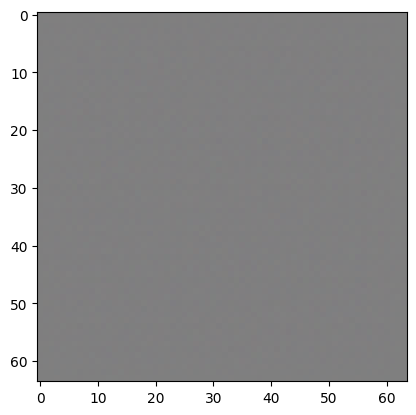

In [17]:
plt.imshow(gen_imgs[6])

### **Penjelasan Logika & Output: Generate & Tampilkan Hasil**

**Logika Kode:**
Setelah modelnya dilatih (atau di-stop di tengah jalan), kode ini:
1.  Bikin 16 *noise* acak.
2.  Minta `generator.predict` buat bikin 16 gambar baru.
3.  Nge-*rescale* gambar dari `[-1, 1]` ke `[0, 1]` biar bisa ditampilin.
4.  Sel berikutnya, `plt.imshow(gen_imgs[6])`, nampilin salah satu gambar (gambar ke-7, karena indeks mulai dari 0) dari 16 gambar yang baru dibuat.

**Output/Efek:**
Sebuah gambar 64x64 hasil generasi Generator ditampilin di *output* notebook. Karena latihannya pake CIFAR-10, hasilnya bakal kayak objek/hewan buram, bukan lukisan.

In [ ]:
generator.save_weights("/content/drive/MyDrive/models/generator1hour.h5")
discriminator.save_weights("/content/drive/MyDrive/models/discriminator1hour.h5")

### **Penjelasan Logika & Output: Simpen Weights**

**Logika Kode:**
Perintah ini nyimpen 'otak' atau bobot (*weights*) dari model Generator dan Diskriminator yang udah dilatih ke Google Drive lo. Jadi, kalo Colab-nya mati, lo gak perlu ngelatih ulang dari nol.

**Output/Efek:**
Dua file baru, `generator1hour.h5` dan `discriminator1hour.h5`, bakal kesimpen di folder `/content/drive/MyDrive/models/` di Google Drive lo.

### **8) Making GIF**

In [19]:
# Display a single image using the epoch number
# def display_image(epoch_no):
#   return PIL.Image.open('generated_images/%.8f.png'.format(epoch_no))

anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('generated_images/*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)

  if filenames:  # Check if filenames is not empty
    image = imageio.imread(filenames[-1])
    writer.append_data(image)

### **Penjelasan Logika & Output: 8) Making GIF**

**Logika Kode:**
Kode ini ngumpulin semua gambar `.png` yang udah disimpen di folder `generated_images` selama proses latihan.
1.  `glob.glob` ngambil semua nama file-nya.
2.  `sorted(filenames)` ngurutin nama filenya (berdasarkan nama `0.00000001.png`, `0.00000002.png`, dst).
3.  `imageio.get_writer` ngebuka file `dcgan.gif` buat ditulis.
4.  Dia nge-loop semua nama file, ngebaca gambarnya pake `imageio.imread`, dan nambahin gambar itu sebagai *frame* baru di file GIF.
5.  Terakhir, dia nambahin gambar terakhir sekali lagi biar animasinya ada jeda dikit di akhir.

**Output/Efek:**
Sebuah file `dcgan.gif` dibuat di direktori Colab. Kalo lo buka, file ini bakal nunjukkin animasi evolusi hasil gambar Generator dari awal latihan sampe akhir (yang mana hasilnya gambar CIFAR-10 buram, bukan lukisan).